### Analyzing the Stroop Effect
##### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE </font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='purple'>PURPLE</font>, <font color='orange'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

(1) What is the independent variable? What is the dependent variable?

> The independent variable is the variable which is not affected by other factors. It is also known as experimental or predictor variables. While the dependent variables are those who are affected by other factors, which could be also called outcome variable. During the research, in general, the independent variables are considered having effect on dependent variable.<br />
<br />
In our research, 
- the independent variables = congruent words & incongruent words; <br /> 
- the dependent variable = reaction time to recognize the ink colors for the words.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

> The goal of the search is to verify whether or not there is a difference of reaction time (unit: second) to recognize the ink color between the incongruent words and the congruent words.<br />  
$H_{0}$: $μ_{c}$ = $μ_{i}$<br /> 
$H_{1}$: $μ_{c}$ ≠ $μ_{i}$<br />
<br />
Null hypothesis $H_{0}$: there is no difference of mean reaction time between the incongruent words and the congruent words of population.<br />
Alternative hypothesis $H_{1}$: there is a difference of mean reaction time between the incongruent words and the congruent words of population.<br />
<br />
$μ_{c}$ = mean of reaction time for the congruent words of population;<br />
$μ_{i}$ = mean of reaction time for the incongruent words of population.<br />
<br />
<br />
**Assumption and reason**<br />
In this research, we will use the paired sample T-test.<br /> 
The assumptions for paired sample T-test are:
- the two samples should have **same sizes and same order**;
- the diffrence of the mean between two samples follows a **normal distribution** with a **sample size < 30** and **unknown standard deviation σ for population**.<br />
<br />Here, there is no population parameter provided. Other three conditions will be verified in the following analysis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/Users/wgarcia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load data and have a general idea of the dataset
stroop = pd.read_csv('stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# understand number of column and row as well as data type
stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


> As we can see, the sample size is small: 24 < 30, which responds one of the conditions to do T-test instead of Z-test. <br />
Also, the sample sizes for congruent and incongruent words are equal.

In [4]:
# Add the column of reation time difference between congruent words and incongruent words
stroop['difference'] = stroop['Incongruent'] - stroop['Congruent']
stroop.head()

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


### Study of central tendancy

In [5]:
# describe the statistical information about the dataset
stroop.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


> In general, the reaction time for the incongruent words is longer than congruents. The mean and the median are very close for both group.

In [6]:
# calculate the frequence of reaction time for each group
stroop.mode()

,Congruent,Incongruent,difference
0,8.630,15.687,1.950
1,8.987,17.394,2.196
2,9.401,17.425,2.348
3,9.564,17.510,2.437
4,10.639,17.960,3.346
5,11.344,18.644,3.401
6,12.079,18.741,3.727
7,12.130,19.278,5.153
8,12.238,20.330,6.081
9,12.369,20.429,6.644


> As swe can see, all datas appear only once.

### Study of measure of variability

#### Calculation: measure of samples

In [7]:
## Calculate the measure of spread (dispersion) for each group
# dispersion for congruent words
rang_Congruent_min = min(stroop.Congruent)
rang_Congruent_max = max(stroop.Congruent)
rang_Congruent = rang_Congruent_max - rang_Congruent_min
print('The measure of spread of reaction time for congruent words is {0:.2f} seconds.'.format(rang_Congruent))
### can also use: range = np.ptp(stroop.Congruent)

# dispersion for incongruent words
rang_Incongruent_min = min(stroop.Incongruent)
rang_Incongruent_max = max(stroop.Incongruent)
rang_Incongruent = rang_Incongruent_max - rang_Incongruent_min
print('The measure of spread of reaction time for incongruent words is {0:.2f} seconds.'.format(rang_Incongruent))

The measure of spread of reaction time for congruent words is 13.70 seconds.
The measure of spread of reaction time for incongruent words is 19.57 seconds.


In [8]:
# calculate the quartile range for two observations
import scipy.stats as sc
iqr_Congruent = sc.iqr(stroop.Congruent)
print('iqr_Congruent = {0:.2f}'.format(iqr_Congruent))
iqr_Incongruent = sc.iqr(stroop.Incongruent)
print('iqr_Incongruent = {0:.2f}'.format(iqr_Incongruent))

iqr_Congruent = 4.31
iqr_Incongruent = 5.33


In [9]:
# calculate the variable for two observations
# For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_c = stroop.Congruent.var(ddof = 1)
## var_c = np.var(stroop.Congruent, ddof = 1)
var_i = stroop.Incongruent.var(ddof = 1)
## var_i = np.var(stroop.Incongruent, ddof = 1)

var_c, var_i

(12.669029070652174, 23.011757036231884)

In [10]:
# calculate the standard deviation for the difference between two observations
std_d = stroop.difference.std(ddof = 1)
# calculate the mean for the difference between two observations
mean_d = stroop.difference.mean()
# calculate standard error of the mean difference between two observations
se_d = std_d / np.sqrt(stroop.shape[0])

std_d, mean_d, se_d

(4.864826910359056, 7.964791666666667, 0.9930286347783406)

#### Calculation: measure of population

In [11]:
# calculate the variable for the populaiton of each group
var_Congruent = np.var(stroop.Congruent)
print('var_Congruent = {0:.2f}'.format(var_Congruent))
var_Incongruent = np.var(stroop.Incongruent)
print('var_Incongruent = {0:.2f}'.format(var_Incongruent))

var_Congruent = 12.14
var_Incongruent = 22.05


In [12]:
# calculate the standard deviation for the population of each group
std_Congruent = np.std(stroop.Congruent)
print('std_Congruent = {0:.2f}'.format(std_Congruent))
std_Incongruent = np.std(stroop.Incongruent)
print('std_Incongruent = {0:.2f}'.format(std_Incongruent))

std_Congruent = 3.48
std_Incongruent = 4.70


> From the calculation of range, IQR, variance and standard deviation, we can see that: 
- the datas for incongruent words are more dispersing than those for congruent words;
- the datas for incongruent words are more fluctuant than those for congruent words.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'density')

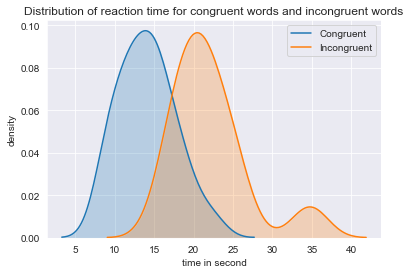

In [13]:
# Check the distribution of reaction time for each group
sns.set_style("darkgrid")
sns.kdeplot(stroop.Congruent, shade=True);
sns.kdeplot(stroop.Incongruent, shade=True);
plt.title('Distribution of reaction time for congruent words and incongruent words')
plt.xlabel('time in second')
plt.ylabel('density')
#sns.distplot(stroop.Congruent);
#sns.distplot(stroop.Incongruent);

Text(0,0.5,'density')

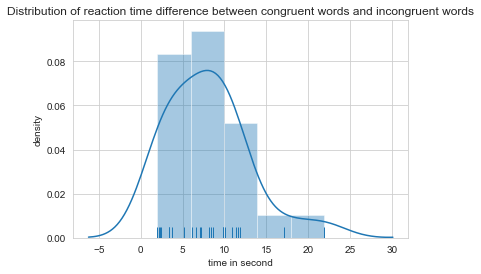

In [14]:
# Check if reaction time difference following the Central Distribution
sns.set_style("whitegrid")
sns.distplot(stroop.difference, rug=True);
plt.title('Distribution of reaction time difference between congruent words and incongruent words')
plt.xlabel('time in second')
plt.ylabel('density')

> The distribution of the difference approximates a normal distribution and satisfies the conditions of use of t-test, so we could use the paired sample t-test.

Text(0,0.5,'reactio time in second')

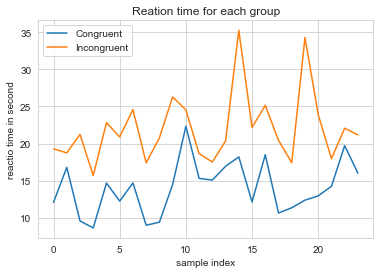

In [15]:
# Visualise the reation time for each group
plt.plot(stroop.Congruent);
plt.plot(stroop.Incongruent);
plt.legend(('Congruent', 'Incongruent'))
plt.title('Reation time for each group')
plt.xlabel('sample index')
plt.ylabel('reactio time in second')

In [16]:
# add index column for the future plot purpose
stroop = stroop.reset_index()
stroop.rename(columns={'index':'sample_ind'}, inplace=True)
stroop.head()

,sample_ind,Congruent,Incongruent,difference
0,0,12.079,19.278,7.199
1,1,16.791,18.741,1.950
2,2,9.564,21.214,11.650
3,3,8.630,15.687,7.057
4,4,14.669,22.803,8.134


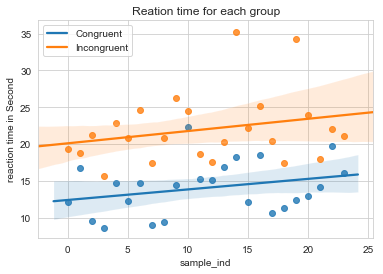

In [17]:
sns.regplot(x=stroop["sample_ind"], y=stroop["Congruent"], data=stroop, ci=95);
sns.regplot(x=stroop["sample_ind"], y=stroop["Incongruent"], data=stroop, ci=95);
plt.title('Reation time for each group')
plt.ylabel('reaction time in Second')
plt.legend(['Congruent', 'Incongruent'])

> From this graph, we could confirm the conclusion above for the measure of variability.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### method 1

In [18]:
# Calculate the t-statistics
t1 = mean_d /se_d
t1

8.020706944109957

In [19]:
from scipy.stats import t
#t-critical value for a 95% confidence level and degree of freedom
t.ppf(.95, stroop.shape[0]-1)

1.7138715277470473

In [20]:
t1 > t.ppf(.95, 23)

True

In [21]:
from scipy import stats
# import scipy.stats as stats
p=stats.t.sf(t1, df= (stroop.shape[0]-1))
p

2.051500292855589e-08

### method 2

In [22]:
# Perform t and p-value here under paired sample t test
t2, p_twotailed = stats.ttest_rel(stroop.Congruent, stroop.Incongruent, axis=0)
print("t2 = " + str(t))
print("p-value_onetailed = " + str(p_twotailed/2))

t2 = <scipy.stats._continuous_distns.t_gen object at 0x18112b30b8>
p-value_onetailed = 2.051500292855589e-08


In [23]:
# verify if p-value < 0.05
p_twotailed/2 < 0.05

True

In [24]:
# Computer the confidence interval
from scipy.stats import sem, t
confidence = 0.95
n = stroop.shape[0]
m = stroop.difference.mean()
std_err = sem(stroop.difference)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h
print('The confidence interval is [{}, {}].'.format(start, end))
print('95% of reaction time difference bewteen congruent words and incongruent would be between [{}, {}].'.format(start, end))

The confidence interval is [5.910555423968423, 10.019027909364912].
95% of reaction time difference bewteen congruent words and incongruent would be between [5.910555423968423, 10.019027909364912].


> P-value is much smaller than α(=5%), so we reject $H_{0}$. There is statical significance. The stroop effect does exist.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> The conclusions obtained from the test are completely match our expectations. The Stroop effect has been experimentally demonstrated and this experience has been widely used in the field of neuropsychology. <br/>
The reason for this effect is that people are affected by the environment during the cognitive process. If there are interferences in the environment when we are recognising, the cognitive time will naturally become longer, because the brain will need to divert some attention to suppress this interference.